# Sentiment Analysis of Yelp Restaurant Reviews

in this notebook, I will perform sentiment analysis using two techniques:
1. VADER (Bag of words)
2. Roberta Pretrained Model from Huggingface

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/calebtran7/NLP-Sentiment-Analysis-Yelp-Restaurant-Reviews/main/Yelp%20Restaurant%20Reviews.csv')

In [54]:
df.head()

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [55]:
df['Review Text'].values[0]

'All I can say is they have very good ice cream I would for sure recommend their cookies and creme ice cream it is very good'

In [56]:
df.shape

(19896, 4)

In [57]:
df['Id'] = range(1, 19897)

In [58]:
df.head()

,Yelp URL,Rating,Date,Review Text,Id
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...,1
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...,2
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...,3
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...,4
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...,5


## Preliminary EDA

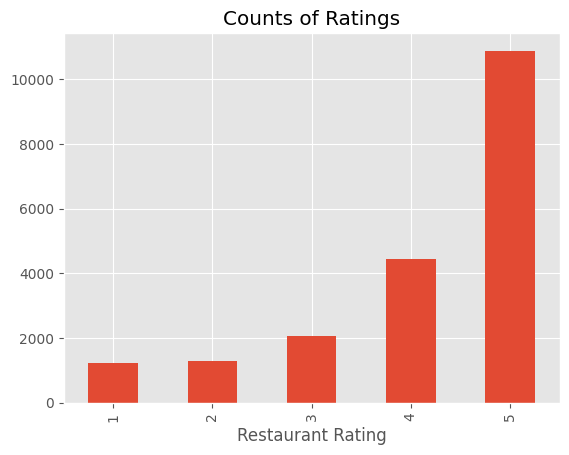

In [59]:
ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar',
                                              title = 'Counts of Ratings')
ax.set_xlabel('Restaurant Rating')
plt.show()

## Preliminary NLTK

In [60]:
ex = df['Review Text'][50]
print(ex)

So happy my brother and sister-in-law sent over a little surprise from Rewind. Now I have this place on my list. Drinks were super yummy. The Thai tea was delicious and is always a good drink to default on when you're having a hard time choosing from all the other milk teas. I'll have to stop in to see the rest of the menu but I'm confident that they'll be just as good as the three that were delivered. Also, their quality does not lack as you can see from the photos. The drinks traveled well.


In [61]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(ex)
tokens[:20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['So',
 'happy',
 'my',
 'brother',
 'and',
 'sister-in-law',
 'sent',
 'over',
 'a',
 'little',
 'surprise',
 'from',
 'Rewind',
 '.',
 'Now',
 'I',
 'have',
 'this',
 'place',
 'on']

In [62]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:20]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('So', 'RB'),
 ('happy', 'JJ'),
 ('my', 'PRP$'),
 ('brother', 'NN'),
 ('and', 'CC'),
 ('sister-in-law', 'NN'),
 ('sent', 'NN'),
 ('over', 'IN'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('surprise', 'NN'),
 ('from', 'IN'),
 ('Rewind', 'NNP'),
 ('.', '.'),
 ('Now', 'RB'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('this', 'DT'),
 ('place', 'NN'),
 ('on', 'IN')]

In [63]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  So/RB
  happy/JJ
  my/PRP$
  brother/NN
  and/CC
  sister-in-law/NN
  sent/NN
  over/IN
  a/DT
  little/JJ
  surprise/NN
  from/IN
  (GPE Rewind/NNP)
  ./.
  Now/RB
  I/PRP
  have/VBP
  this/DT
  place/NN
  on/IN
  my/PRP$
  list/NN
  ./.
  Drinks/NNS
  were/VBD
  super/JJ
  yummy/NN
  ./.
  The/DT
  (GPE Thai/NNP)
  tea/NN
  was/VBD
  delicious/JJ
  and/CC
  is/VBZ
  always/RB
  a/DT
  good/JJ
  drink/NN
  to/TO
  default/VB
  on/IN
  when/WRB
  you/PRP
  're/VBP
  having/VBG
  a/DT
  hard/JJ
  time/NN
  choosing/VBG
  from/IN
  all/PDT
  the/DT
  other/JJ
  milk/NN
  teas/NNS
  ./.
  I/PRP
  'll/MD
  have/VB
  to/TO
  stop/VB
  in/IN
  to/TO
  see/VB
  the/DT
  rest/NN
  of/IN
  the/DT
  menu/NN
  but/CC
  I/PRP
  'm/VBP
  confident/JJ
  that/IN
  they/PRP
  'll/MD
  be/VB
  just/RB
  as/RB
  good/JJ
  as/IN
  the/DT
  three/CD
  that/WDT
  were/VBD
  delivered/VBN
  ./.
  Also/RB
  ,/,
  their/PRP$
  quality/NN
  does/VBZ
  not/RB
  lack/VB
  as/IN
  you/PRP
  can/MD
  see/VB
 

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# VADER Sentiment Scoring

"Bag of words" approach:
1. Remove stop words
2. Get the positive/neutral/negative score for each word and combine to a total score

In [64]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [65]:
sia.polarity_scores('I am having an awesome day!')

{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.6588}

In [66]:
sia.polarity_scores('I am so upset and angry.')

{'neg': 0.683, 'neu': 0.317, 'pos': 0.0, 'compound': -0.7548}

In [67]:
sia.polarity_scores(ex)

{'neg': 0.026, 'neu': 0.724, 'pos': 0.25, 'compound': 0.97}

In [68]:
# Run the polarity score on the entire dataset

res = {}
for i, r in tqdm(df.iterrows(), total=len(df)):
  text = r['Review Text']
  myid = r['Id']
  res[myid] = sia.polarity_scores(text)


  0%|          | 0/19896 [00:00<?, ?it/s]

In [69]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [70]:
# Sentiment score and initial dataset
vaders.head()

,Id,neg,neu,pos,compound,Yelp URL,Rating,Date,Review Text
0,1,0.000,0.641,0.359,0.8803,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,2,0.022,0.660,0.318,0.9509,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,3,0.000,0.651,0.349,0.8803,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,4,0.020,0.752,0.227,0.9400,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,5,0.027,0.730,0.243,0.9924,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


# VADER Results Plotted

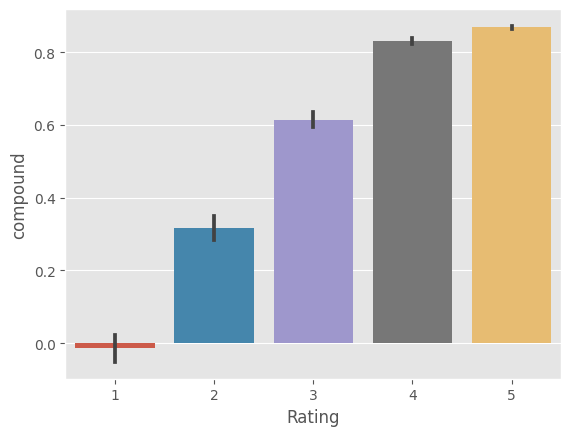

In [71]:
sns.barplot(data=vaders, x = 'Rating', y = 'compound')
ax.set_title('Compound Score by Yelp Star Rating')
plt.show()

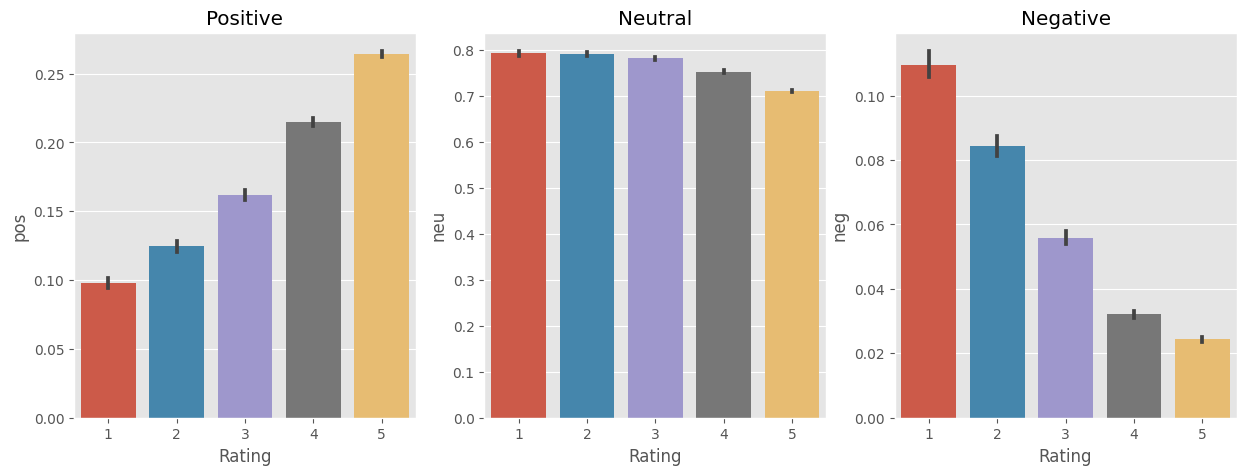

In [72]:
fig, axs= plt.subplots(1, 3, figsize = (15, 5))
sns.barplot(data=vaders, x='Rating', y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax = axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()


## Roberta Pretrained Model (Transformer-based)

Transformer model accounts for not only the words, but also the context related to other words.



In [73]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00


In [74]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [75]:
# Model that has been pre-trained for sentiment
# Transfer learning
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [76]:
# VADER score results on this example review
print(ex)
sia.polarity_scores(ex)

So happy my brother and sister-in-law sent over a little surprise from Rewind. Now I have this place on my list. Drinks were super yummy. The Thai tea was delicious and is always a good drink to default on when you're having a hard time choosing from all the other milk teas. I'll have to stop in to see the rest of the menu but I'm confident that they'll be just as good as the three that were delivered. Also, their quality does not lack as you can see from the photos. The drinks traveled well.


{'neg': 0.026, 'neu': 0.724, 'pos': 0.25, 'compound': 0.97}

In [77]:
# Run the example for Roberta Model
encoded_text = tokenizer(ex, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

print(scores_dict)

{'roberta_neg': 0.0018132817, 'roberta_neu': 0.009613755, 'roberta_pos': 0.98857296}


In [78]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(ex, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores

  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict

In [79]:
shortened_df = df.head(300)

In [80]:
res = {}
for i, r in tqdm(shortened_df.iterrows(), total=len(shortened_df)):
  text = r['Review Text']
  myid = r['Id']
  vader_result = sia.polarity_scores(text)
  vader_result_rename = {}
  for key, value in vader_result.items():
    vader_result_rename[f"vader_{key}"] = value

  roberta_result = polarity_scores_roberta(text)
  both = {**vader_result_rename, **roberta_result}
  res[myid] = both

  0%|          | 0/300 [00:00<?, ?it/s]

In [81]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

# The Transformers Pipeline (Predictions)

In [82]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [83]:
sent_pipeline("The food was so good!")

[{'label': 'POSITIVE', 'score': 0.9998691082000732}]

In [84]:
sent_pipeline("The steak was undercooked and the service was poor.")

[{'label': 'NEGATIVE', 'score': 0.9997597336769104}]